<a href="https://colab.research.google.com/github/egs1sos/IS-4487/blob/main/assignment_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IS4487 Assignment 10: Classfication with Decision Trees**

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data
3. Fit a model
4. Test the accuracy of the model
6.  Use the model to predict on a new dataset (without the target)

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case: AdviseInvest
You work on a small team of data analysts at AdviseInvest, a venture-backed startup. The Director of Sales at AdviseInvest has approached your team asking for help solving a staffing problem.

### The Company
The company's mission is to provide tools and support to help ordinary people gain control of their personal finances. The company leverages technology to provide affordable financial advice to a national client base.

Customers who reach AdviseInvest's website go through five steps:

- Open an account.
- Complete a customer profile form with basic information about their background and finances.
- Schedule a free phone conversation with a sales representative during a 1-hour window of time.
- Attend the free phone conversation.
- Buy a financial plan.
- There are three types of financial plans: Beginner, Intermediate, and Advanced. Each is sold at a different price, and there are varying degrees of personalization. After a customer purchases a financial plan, the customer is assigned a financial planner who helps determine the customer's goals and advises the customer on spending decisions.

### The Problem
Some customers are lost at each stage of the process. Steps 3 and 4 are particularly challenging because approximately 50% of those who schedule a phone conversation fail to pick up the call. This leads to inefficiencies from a staffing perspective.

AdviseInvest has 4 sales reps on staff during each particular 1-hour window. Each of the 4 reps is assigned 2 prospective customers per hour, which means that the company schedules a total of 8 phone calls per hour. The calls are outgoing: sales reps call customers who scheduled a phone conversation during that hour window.

Unfortunately, as noted above, many of the customers who scheduled a call do not answer. As a consequence, sales reps are often left underutilized. Moreover, they are underutilized unevenly. For example, it is possible that one sales rep will not do any sales calls during that hour, whereas another will be busy the entire hour with two calls. Sales reps have nothing to do when customers do not answer the scheduled phone call.

### AdviseInvest Data Dictionary


| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |

## **Task 1. Import libraries, Load the Data and Preview it**

1.1. Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib

1.2. Initial Data Understanding
- Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)

1.3. Preview the data
- Describe or profile the dataframe
- Look for any outliers, missing values, or duplicates (enough to describe it)

In [ ]:
# 🔧 1.1. Add code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 🔧 1.2. Import the data
url = '/content/adviseinvest_historical_data.csv'
df = pd.read_csv(url)
df.head()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [ ]:
 # 🔧 1.3. Preview the data
 df.info()

 # View a few rows
 df.head()

 # View the datatypes
 df.dtypes

 # Describe the data
 df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


## **Task 2. Data Preparation**

### **2.1. Data Cleanup**
2.1.1. Delete any obvious outliers

2.1.2. Remove any variables that are not relevant to our analysis (be sure not to delete too many variables, you may need them in the near future!)

2.1.3 Clean up any missing data or non-standardized data.

Save the data in a new datafram named "df_clean"


In [ ]:
# 🔧 2.1.1. Delete outliers
df_clean = df[df['income'] <= 100000].copy()
print(f"Shape of dataframe after removing income outliers: {df_clean.shape}")

Shape of dataframe after removing income outliers: (28032, 14)


In [ ]:
# 🔧 2.1.2. Remove variables that are not helpful
df_clean = df_clean.drop(columns=['product'])
print(f"Shape of dataframe after removing variables: {df_clean.shape}")

Shape of dataframe after removing variables: (28032, 13)


In [ ]:
# 🔧 2.1.3. Cleanup any missing or non-standardized data
df_clean.isnull().sum()

,0
answered,0
income,0
female,0
age,0
job,0
num_dependents,0
rent,0
own_res,0
new_car,2
chk_acct,0


### **2.2. Clean up the data types of features. Convert to int**

 2.2.1. Convert any variables that should be an integer into an integer

In [ ]:
# 🔧 2.2.1. Convert variables to integer data type
df_clean['income'] = df_clean['income'].astype(int)
df_clean.dtypes

,0
answered,int64
income,int64
female,object
age,int64
job,int64
num_dependents,int64
rent,int64
own_res,int64
new_car,float64
chk_acct,int64


### **2.3. Clean up the data types of features. Convert to categorical**

2.3.1. Change the target, `answered` to yes/no and make it categorical

2.3.2. Find at least 8 variables that would be appropriate to convert to categories

In [ ]:
# 🔧 2.3.1. Convert answered to categorical
df_clean['answered'] = df_clean['answered'].astype('category')
df_clean.dtypes

,0
answered,category
income,int64
female,object
age,int64
job,int64
num_dependents,int64
rent,int64
own_res,int64
new_car,float64
chk_acct,int64


In [ ]:
# 🔧 2.3.2. Convert categorical variables
df_clean['female'] = df_clean['female'].astype('category')

## **Task 3: Exploratory Data Analysis (EDA)**

### **3.1.-3.5. Draw charts**
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted



<Axes: xlabel='answered', ylabel='count'>

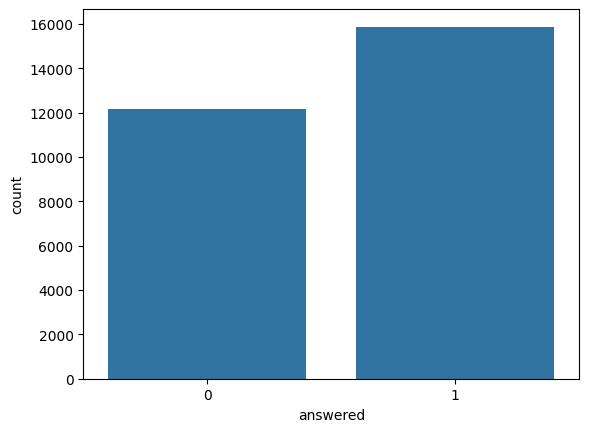

In [ ]:
# 🔧3.1. Chart 1
sns.countplot(x='answered', data=df_clean)

<Axes: xlabel='female', ylabel='count'>

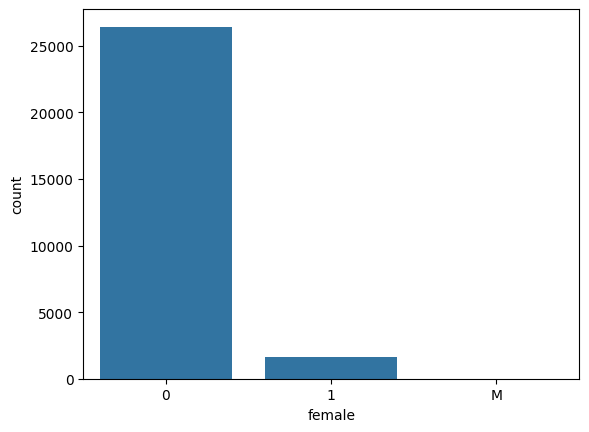

In [ ]:
# 🔧3.2. Chart 1
sns.countplot(x='female', data=df_clean)

<Axes: xlabel='age', ylabel='income'>

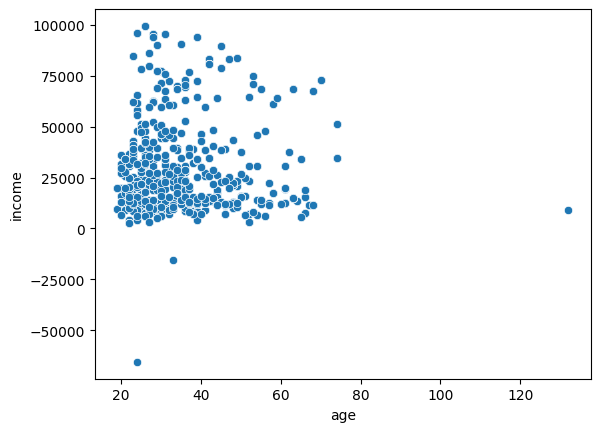

In [ ]:
# 🔧3.3. Chart 1
sns.scatterplot(x='age', y = 'income', data=df_clean)

<Axes: xlabel='job', ylabel='count'>

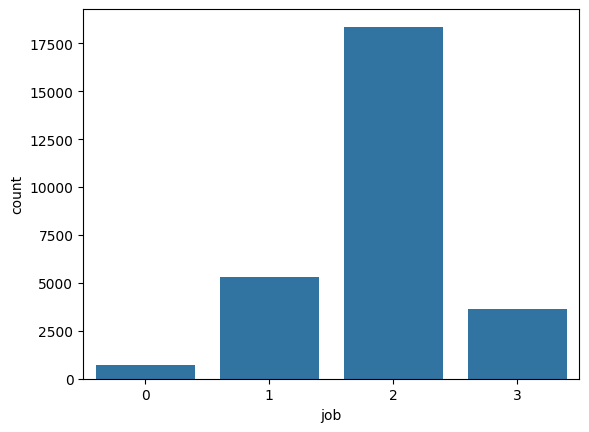

In [ ]:
# 🔧3.4. Chart 1
sns.countplot(x='job', data=df_clean)

<Axes: xlabel='num_dependents', ylabel='income'>

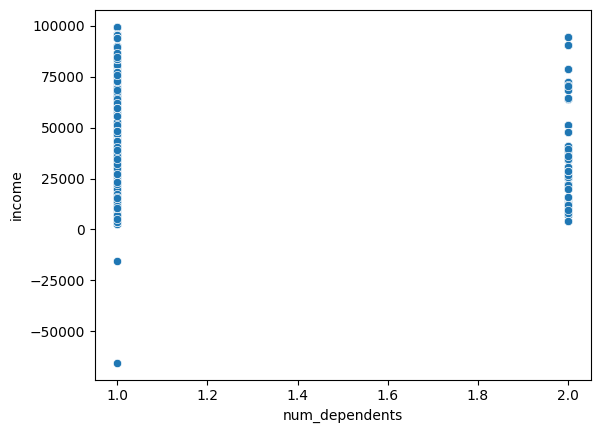

In [ ]:
# 🔧3.5. Chart 1
sns.scatterplot(x='num_dependents', y = 'income', data=df_clean)

## **Task 4. Modeling**

### **4.1. Calculate the base probability of answering**

If we use no model at all, how good is our chance of predicting someone leaving?  
* Use a calculation to find the chances of someone leaving.

In [ ]:
# 🔧 4.1. Get the default probability
df_clean['answered'].value_counts(normalize=True)

,proportion
answered,
1,0.56621
0,0.43379


### **4.2. Split the training and testing datasets**

Split `df_clean` using `train_test_split()` function
- all variables except answered should be in the `X` variable
- `answered` is in the `y` variable


In [ ]:
# 🔧 4.2 Split data into training and testing sets
from sklearn.model_selection import train_test_split
df_clean.columns
target = 'answered'
X = df_clean.drop(columns=[target])
y = df_clean[target]

### **4.3. Create and Visualize a Decision Tree**
4.3.1. Use all available attributes (except those that were eliminated in step 3)
- As a baseline, you can try `criterion` = "entropy" and  `max_depth` = 4

4.3.2. Visualize the tree

In [ ]:
# 🔧 4.3.1. Create a Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['female'] = le.fit_transform(X['female'])

dt = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.5446428571428571, 0.9, 'chk_acct <= 2.5\nentropy = 0.987\nsamples = 28032\nvalue = [12160, 15872]\nclass = yes'),
 Text(0.2857142857142857, 0.7, 'sav_acct <= 1.5\nentropy = 0.988\nsamples = 18112\nvalue = [10240, 7872]\nclass = no'),
 Text(0.4151785714285714, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'mobile <= 0.5\nentropy = 0.961\nsamples = 14656\nvalue = [9024, 5632]\nclass = no'),
 Text(0.07142857142857142, 0.3, 'income <= 5900.0\nentropy = 0.943\nsamples = 13696\nvalue = [8768, 4928]\nclass = no'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.037\nsamples = 257\nvalue = [1, 256]\nclass = yes'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.932\nsamples = 13439\nvalue = [8767, 4672]\nclass = no'),
 Text(0.21428571428571427, 0.3, 'income <= 49625.0\nentropy = 0.837\nsamples = 960\nvalue = [256, 704]\nclass = yes'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.0\nsamples = 512\nvalue = [0, 512]\nclass = yes'),
 Text(0.25, 0.1, 'entropy = 0.985\nsamples = 448\nvalue = [25

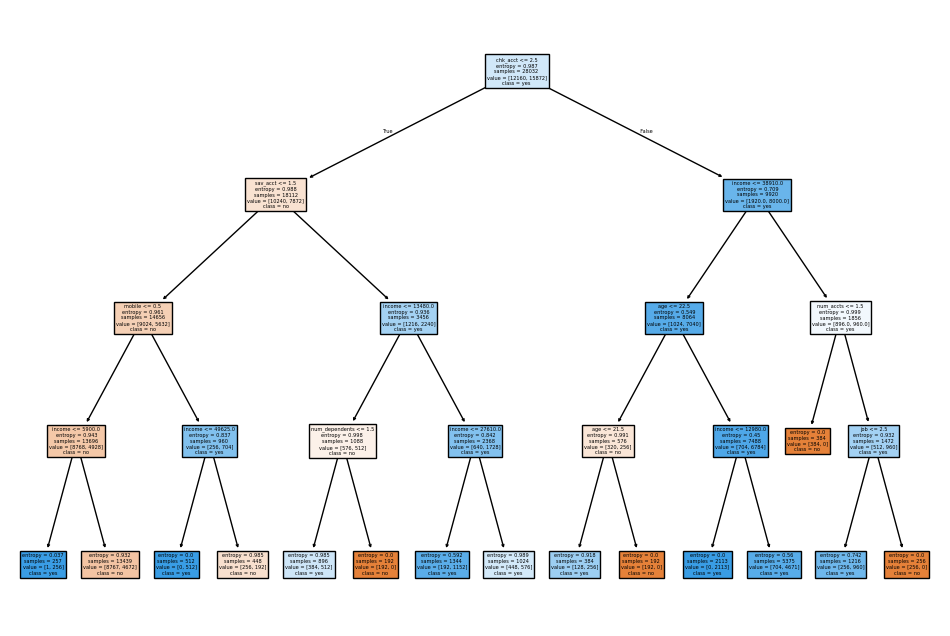

In [ ]:
# 🔧 4.3.2. display (visualize) the Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=['no', 'yes'], filled=True)

### **4.4. What is the accuracy?**

This should be better than the base probability, or you have failed in your objective

In [ ]:
# 🔧 4.4. Calculate the probability for your tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = dt.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7511058789954338


### **4.5: Create a confusion matrix**

This will show false positives, true positives, false negatives and true negatives.

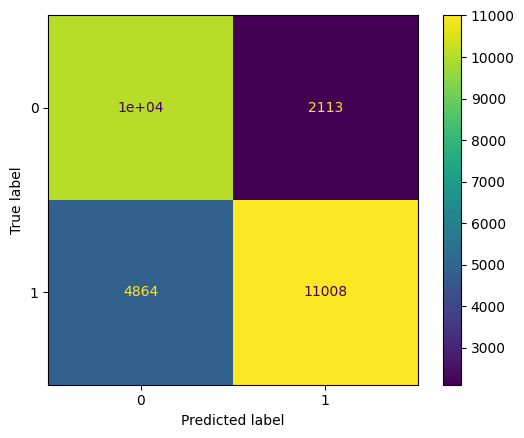

In [ ]:
# 🔧 4.5.1 Create a basic confusion matrix using sklearn's functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()


Create a more visual, interpretable version of the matrix

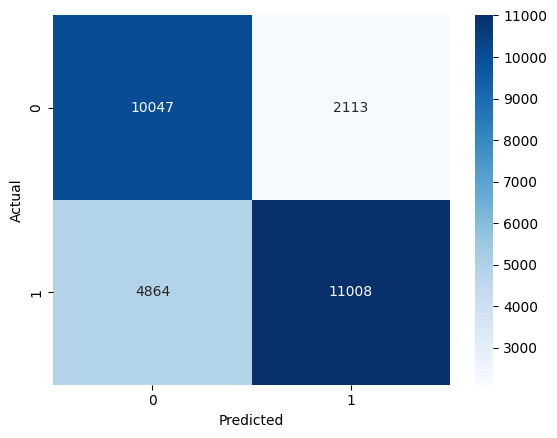

In [ ]:
# 🔧 4.5.2. Create a beautiful matrix; hint - try using Seaborn Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Step 5: Evaluate the Model**

Earlier, we calculated the technical accuracy of the model. It is also important to evaluate the model economically. What would be the economic benefit of using this model for the business?

**Assumptions**

One of the simplifying assumptions we will make in this project is that all the customers who answer the phone will purchase a product. (This assumption is actually verified by the data.) To model `answered` as thew target in this case is therefore equivalent to modeling `purchased` as the target.

There are costs and benefits in this case. We will assume that customers purchase a product for 100 dollars. This was the average cost of AdviseInvest products, according to the Director of Sales.  Also, as we learned in the interview, the agent time to make the sale is worth 25 dollars. Profit would therefore be \$75 dollars for an answered call and a purchase. In sum:

**Benefit**: True positive. The customer is predicted to answer, does answer, and purchases a product for 100 dollars for a profit of 100 - 25 = 75.

**Cost**: False positive. The customer is predicted to answer, but does not answer, so there is a loss of 25. (We assume the agent cannot schedule another call at the last minute, or spends the entire time slot trying to make the call.)

When you create a calculation you can use:
- True answered * 75 -> These people purchased
- False answered * 25 -> You can't schedule another call

For this exercise, we propose that customers who are not predicted to answer will not be called, so there would be no benefits and no costs for them.  

### **5.1. Calculate the Profit Using the Model**

In [ ]:
# 🔧 5.1. Write a calcuation for the profit from your model
tn, fp, fn, tp = cm.ravel()
profit_model = (tp * 75) - (fp * 25)
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"Profit using the model: ${profit_model}")

True Positives (TP): 11008
False Positives (FP): 2113
Profit using the model: $772775


### **5.2 Compare to the Default Profit**

How much profit (revenue - costs) could be expected if all customers are called? We can consider this a baseline case for profit since it does not require a model.

In other words, to calculate profit in this baseline scenario treat the customers who answer as true positives, treat the customers who do not answer as false positives.

In [ ]:
# 🔧 5.2. Write a calculation for the overall profit without using the model (default)
profit_default = (df_clean['answered'].value_counts()[1] * 75) - (df_clean['answered'].value_counts()[0] * 25)
print(f"Profit without using the model: ${profit_default}")

Profit without using the model: $886400


### **Improve the model, and apply the best model to new (truly unseen) Data**

### **5.3 Tune the Model**

5.3.1. Create a new tree by adjusting the size or shape of the tree,

5.3.2. then test the accuracy

Keep changing these parameters until you end up with a tree with accuracy that is better than the initial model

In [ ]:
# 🔧 5.3.1. Create a new version of the tree with new parameters
dt = DecisionTreeClassifier(criterion='entropy', max_depth=15)
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [ ]:
# 🔧 5.3.2. Calculate evaluation metrics
y_pred = dt.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.910958904109589


### **5.4 Apply the Model to New Customers**

5.4.1. Import the "adviseinvest_new_customer_data.csv" file

5.4.2. Using the tree model, predict the target variable for each customer by feeding the new customer data into the model

In [ ]:
# 🔧 5.4.1. Import new customer data into a new data frame
url = '/content/adviseinvest_new_customer_data.csv'
df_new = pd.read_csv(url)
df_new.head()

,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,customer_id
0,30010,0,40,2,1,1,0,0,1,0,3,0,H1597
1,30510,0,54,2,1,0,1,0,0,0,2,0,P1446
2,12880,0,48,2,2,0,1,0,0,1,4,0,E1492
3,15530,0,44,2,1,0,1,0,0,0,2,0,W5143
4,46230,0,40,3,1,0,1,0,3,1,2,0,W4927


In [ ]:
# 🔧 5.4.2. Apply the above best model, Predict the number of customers who will be yes/no for the target variable
df_new_for_prediction = df_new.drop(columns=['customer_id']).copy()
df_new_for_prediction['female'] = le.transform(df_new_for_prediction['female'])
y_pred_new = dt.predict(df_new_for_prediction)
y_pred_new

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,

## **Task 6: Conclusion**

### ✍️ Please answer the following:

6.1. Did we improve our profit using the model?

6.2: How else could the model be utilized by the business?






### ✍️ Your Response:

6.1. Write your conclusion notes below:  
Our projected profits actually went down compared to not using the model, although the updated decision tree is more accurate.



6.2. Write your recommendations below:  
I would recommend looking at other variables and eliminating any false positives.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Save the file with your last name and first name as shown below (see detailed instructions in Lab 1 on how to do this).
- Submit the assignment as an **HTML file** on Canvas


In [ ]:
!jupyter nbconvert --to html "assignment_10_LastnameFirstname.ipynb"

[NbConvertApp] WARNING | pattern 'assignment_10_LastnameFirstname.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes